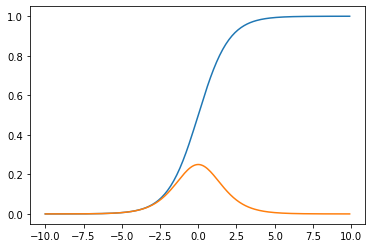

In [180]:
from sigmoid import sigmoid
from sigmoidGradient import sigmoidGradient as sd
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(-10, 10, 0.1)
y = sigmoid(x)
y_prime = sd(x)

plt.plot(x,y)
plt.plot(x, y_prime)


In [181]:
print('Loading and Visualizing Data ...')

mat = scipy.io.loadmat('digitdata.mat')
X = mat['X']
y = mat['y']
y = np.squeeze(y)
m, _ = np.shape(X)

# Randomly select 100 data points to display
sel = np.random.choice(range(X.shape[0]), 100)
sel = X[sel,:]


Loading and Visualizing Data ...


In [182]:
import scipy.io

# Load the weights into variables Theta1 and Theta2
mat = scipy.io.loadmat('debugweights.mat');

# Unroll parameters
Theta1 = mat['Theta1']
Theta1_1d = np.reshape(Theta1, Theta1.size, order='F')
Theta2 = mat['Theta2']
Theta2_1d = np.reshape(Theta2, Theta2.size, order='F')

nn_params = np.hstack((Theta1_1d, Theta2_1d))

In [183]:
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [184]:

import numpy as np

print(np.shape(X))
print(np.shape(Theta1))
print(np.shape(Theta2))


(5000, 400)
(25, 401)
(10, 26)


In [185]:
m = np.shape(X)[0]
ones = np.ones([5000,1])

print(m)
print(np.shape(X))
print(np.shape(Theta1))

X_prime = np.c_[ones, X]

print(np.shape(X_prime))
print(np.shape(Theta1))


5000
(5000, 400)
(25, 401)
(5000, 401)
(25, 401)


In [186]:
z_1 = np.dot(Theta1, X_prime[1])
print(np.shape(z_1))
print(z_1)

(25,)
[-4.81302157 -2.92257775  2.6445065   0.84862076 -1.07786496  5.6037835
 -1.87875993 -7.28728881  5.87517738 -4.42789819 -1.88126592 -4.08040186
 -3.78767782 -2.27465625 -5.83120172  2.68217055  5.90779391 -1.88126755
 -0.764938    1.3114137  -4.49649948  2.65153177  2.10497303  4.69948787
 -2.76096862]


In [187]:
a_1 = sigmoid(z_1)
print(np.shape(a_1))
print(np.shape(Theta2))
print(a_1)

(25,)
(10, 26)
[8.05782163e-03 5.10486829e-02 9.33671593e-01 7.00277736e-01
 2.53910265e-01 9.96329622e-01 1.32531375e-01 6.83712699e-04
 9.97199568e-01 1.17986869e-02 1.32243535e-01 1.66197870e-02
 2.21465558e-02 9.32437832e-02 2.92596199e-03 9.35966335e-01
 9.97289192e-01 1.32243348e-01 3.17575135e-01 7.87749623e-01
 1.10250452e-02 9.34105338e-01 8.91385592e-01 9.90982126e-01
 5.94701645e-02]


In [188]:
a_1 = np.concatenate((np.array([1,]), a_1), axis=None)
z_2 = np.dot(Theta2, a_1)
print(np.shape(z_2))
print(z_2)

(10,)
[ -7.64327488  -6.02365485  -5.66663594 -10.1126475   -5.02416137
  -6.34107747  -4.44692848  -6.03362019  -6.22762221   5.44411453]


In [189]:
a_2 = sigmoid(z_2)
print(a_2)

[4.79026796e-04 2.41495958e-03 3.44755685e-03 4.05616281e-05
 6.53412433e-03 1.75930169e-03 1.15788527e-02 2.39107046e-03
 1.97025086e-03 9.95696931e-01]


In [190]:
def to_digit(x):
    max = np.argmax(x)
    return max+1

a = np.array([0.9,0.1,0.2,100,0.3,0.4,0.7])
print(to_digit(a))

4


In [191]:
def softmax(x):
    f_x = np.exp(x) / np.sum(np.exp(x))
    return f_x

In [192]:
p = softmax(a_2)
print(p)

[0.08523908 0.08540425 0.08549249 0.08520171 0.08575677 0.08534828
 0.08619049 0.08540221 0.08536628 0.23059845]


In [193]:
import numpy as np

from sigmoid import sigmoid

def predict(Theta1, Theta2, X):
#PREDICT Predict the label of an input given a trained neural network
#   p = PREDICT(Theta1, Theta2, X) outputs the predicted label of X given the
#   trained weights of a neural network (Theta1, Theta2)

# Useful values
    m = np.shape(X)[0]              #number of examples

# You need to return the following variables correctly 
    p = np.zeros(m);

# ====================== YOUR CODE HERE ======================
# Instructions: Complete the following code to make predictions using
#               your learned neural network. You should set p to a 
#               vector containing labels between 1 to num_labels.
#

    print(m)
    ones = np.ones([m,1])
    print(np.shape(ones))
    print(np.shape(X))
    X = np.c_[ones,X]
    print(np.shape(X))

    for i in range(m):
        z_1 = np.sum(np.dot(Theta1, X[i]))
        a_1 = sigmoid(z_1)
    
        z_2 = np.sum(np.dot(Theta2, a_1))
        a_2 = sigmoid(z_2)  
     
        p[i] = a_2

        
    p = np.floor(p * 20)
    
    return p

# =========================================================================


In [194]:
pred = predict(Theta1, Theta2, X);

5000
(5000, 1)
(5000, 400)
(5000, 401)


(array([2235.,   58.,   58.,   58.,   63.,   63.,   83.,   89.,  183.,
        2110.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

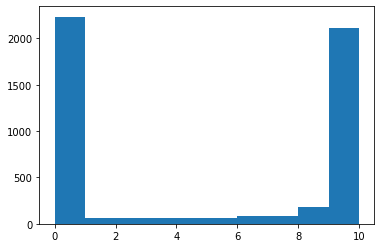

In [195]:
plt.hist(pred)

(array([2235.,   58.,   58.,   58.,   63.,   63.,   83.,   89.,  183.,
        2110.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

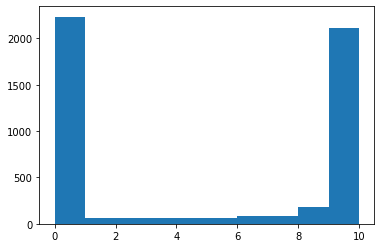

In [196]:
plt.hist(pred)